In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
atheletes=pd.read_csv('C:/Users/91775/Desktop/Projects/Olympics data analysis (Python)/athlete_events.csv')
regions = pd.read_csv('C:/Users/91775/Desktop/Projects/Olympics data analysis (Python)/noc_regions.csv')
#change \ to /

In [4]:
atheletes.head() #show top 5 rows of data otherwise use value in () eg (3) shows 3 rows


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
atheletes.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
#Join dataframes  1st table: athletes 2nd: region common column: NOC
atheletesdf=atheletes.merge(regions, how='left', on='NOC')
atheletesdf.head() #shows top 5 merged columns

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [21]:
atheletesdf.shape  #gives num rows and columns
# (27116, 17)

(271116, 17)

In [22]:
# rename region-Region
atheletesdf.rename(columns={'region':'Region','notes':'Notes'},inplace=True)

In [23]:
atheletesdf.info()
#gives all info about columns, data types etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [24]:
atheletesdf.describe() #its default gives info only abt numerical data types, info includes std dev, %iles,min, max, count etc


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [25]:
# check null values in any columns , gives true false if any
nan_values = atheletesdf.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [104]:
atheletesdf.isnull().sum() #shows number of null columns present 

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [54]:
atheletesdf.query('Event=="Hockey Men\'s Hockey" and Team=="India"' ).sort_values(by=['Year','ID']).head(10)
#shows first 10 hockey participants from india sorted by year ID, remove head to show all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
38352,19716,Dhyan Chand Bais,M,22.0,169.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
76886,39020,Michael Anthony Gateley,M,23.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
82144,41710,"William James ""Willie"" Goodsir-Cullen",M,21.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
89524,45360,Leslie Charles Hammond,M,23.0,184.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
116859,59150,"Feroz-ud-Din ""Feroze"" Khan",M,23.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
150463,75490,George Eric McCarthy Marthins,M,22.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
173081,86987,"Richard Alexander ""Rex"" Norris",M,28.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
189138,95008,Broome Eric Pinniger,M,25.0,180.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN


In [56]:
#top contries with max participation
top_10_countries = atheletesdf.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall participation by country'}, ylabel='Team'>

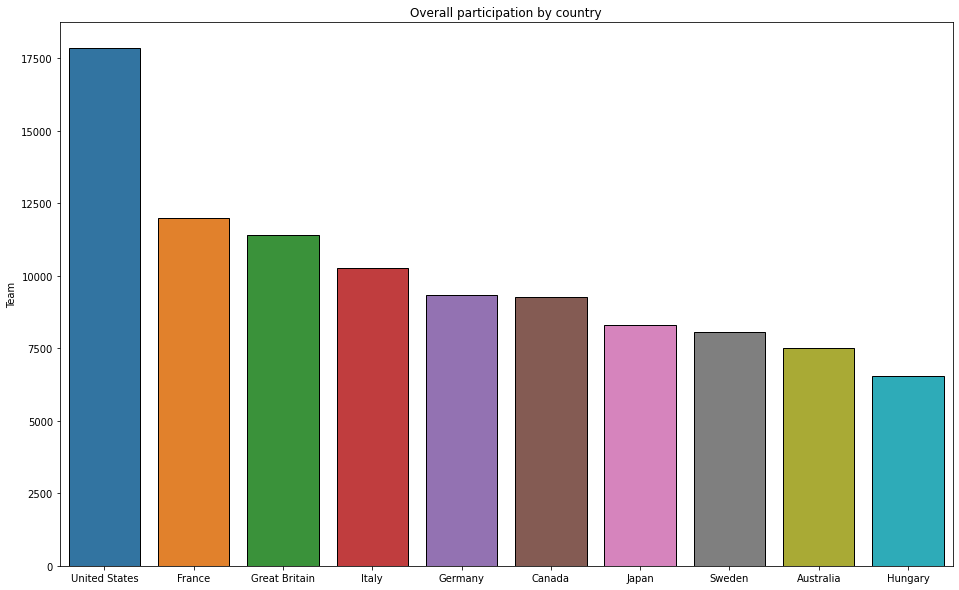

In [82]:
# plot for top 10 countries
plt.figure(figsize=(16,10))
plt.title("Overall participation by country")
sns.barplot(x=top_10_countries.index, y=top_10_countries, edgecolor='black')  #sns is seaborn

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

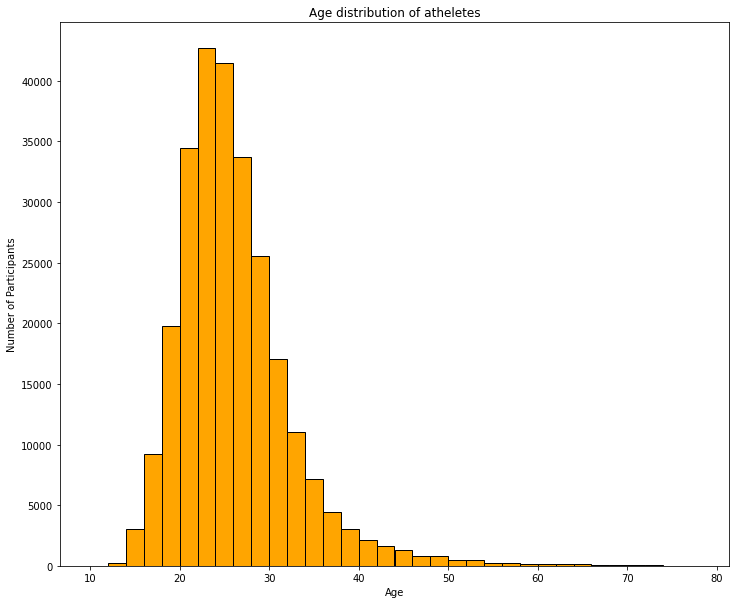

In [81]:
# Age distribution of participants
plt.figure(figsize=(12,10))
plt.title("Age distribution of atheletes")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.hist(atheletesdf.Age, color= 'orange', edgecolor = 'black', bins= [i for i in range(10,80,2)])

In [85]:
# Different sports in winter
winter_sports = atheletesdf.query('Season=="Winter"').Sport.unique()
winter_sports
# These are sports can be played on ice

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [86]:
# Similarly Summer games 
summer_sports = atheletesdf.query('Season=="Summer"').Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [89]:
# Count number of male & female participants
gender_counts = atheletesdf.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x26b92771088>,
 [Text(-0.7147310163003325, 0.8361576252945936, 'M'),
  Text(0.7797064778330213, -0.912172027868222, 'F')],
 [Text(-0.38985328161836313, 0.4560859774334146, '72.5%'),
  Text(0.4548287787359291, -0.5321003495897961, '27.5%')])

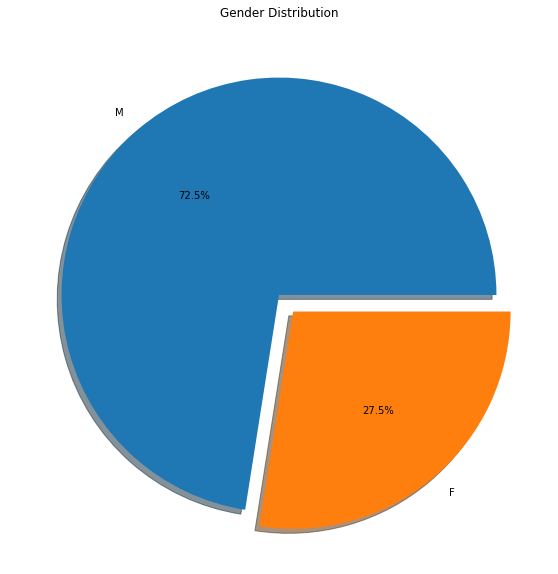

In [100]:
# Pie chart for the same
plt.figure(figsize=(16,10))
explode= (0, 0.1)
plt.title("Gender Distribution")
plt.pie(gender_counts, shadow=True, labels=gender_counts.index, autopct='%1.1f%%', explode=explode)



In [102]:
# Medals won 
atheletesdf.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [111]:
# number of females in each olympics
female_participants = atheletesdf[(atheletesdf.Sex=='F')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
29,2008,5816
30,2010,1847
31,2012,5815
32,2014,2023
33,2016,6223


In [120]:
women_in_olympics = atheletesdf[(atheletes.Sex=='F') & (atheletesdf.Season=='Summer')]

Text(0.5, 1.0, 'Women Participation')

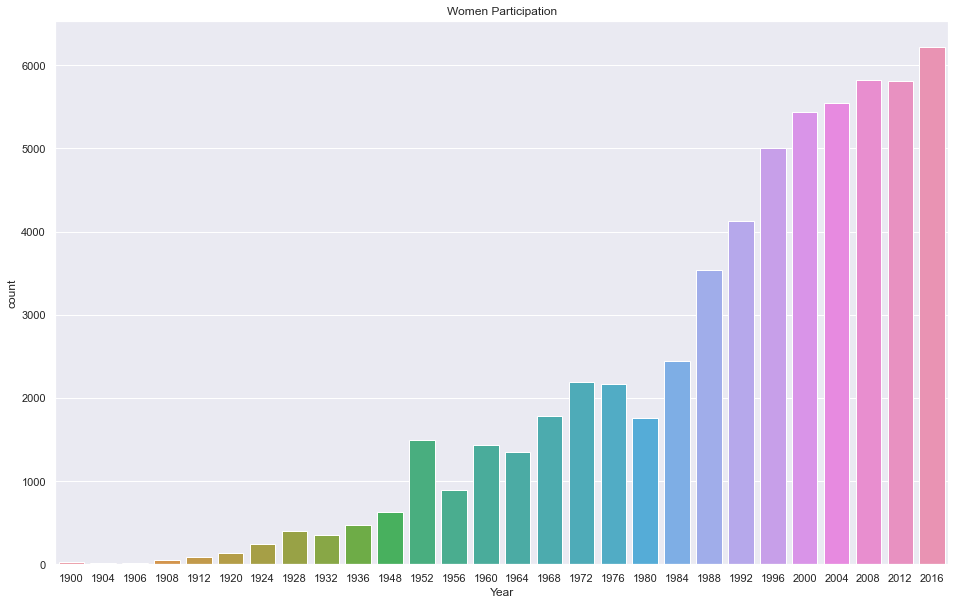

In [121]:
# Only considered summer events for uniformityin graph
sns.set(style="darkgrid")
plt.figure(figsize=(16,10))
sns.countplot(x="Year",data=women_in_olympics)
plt.title('Women Participation')

Text(0.5, 1.0, 'Women participation over time')

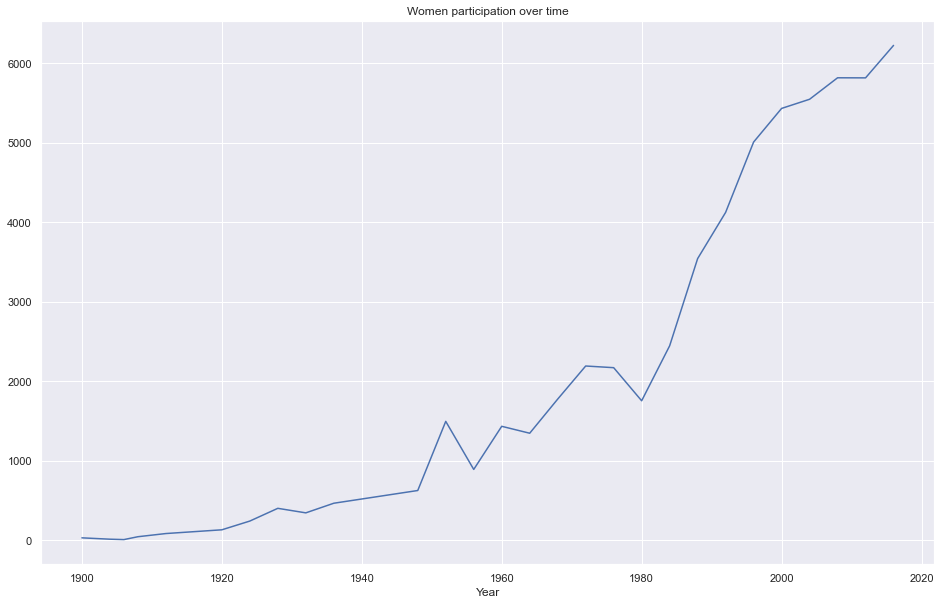

In [122]:
part = women_in_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(16,10))
part.loc[:,'F'].plot()
plt.title("Women participation over time")

In [124]:
# Gold Medalists
GoldMedalists = atheletesdf[(atheletes.Medal=="Gold")]
GoldMedalists.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [139]:
GoldMedalists=GoldMedalists[np.isfinite(GoldMedalists['Age'])]

In [140]:
# Gold Medals at 60+ age
GoldMedalists['ID'][GoldMedalists['Age']>60].count()

6

In [142]:
# Event in which they got gold
Sporting_event=GoldMedalists['Sport'][GoldMedalists['Age']>60]
Sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\91775\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gold at 60+ age')

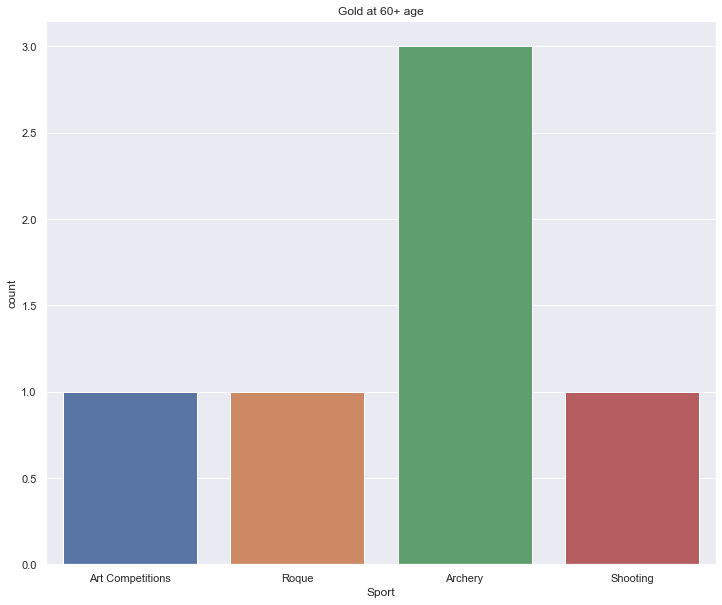

In [144]:
plt.figure(figsize=(12,10))
plt.tight_layout()
sns.countplot(Sporting_event)
plt.title("Gold at 60+ age")

In [149]:
# regionwise gold medal counts
GoldMedalists.Region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


In [152]:
# 2016 summer olympics - Rio
max_year = atheletesdf.Year.max()
print(max_year)

team_names = atheletesdf[(atheletesdf.Year==max_year) & (atheletesdf.Medal == "Gold")].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise gold medals in Rio olympics')

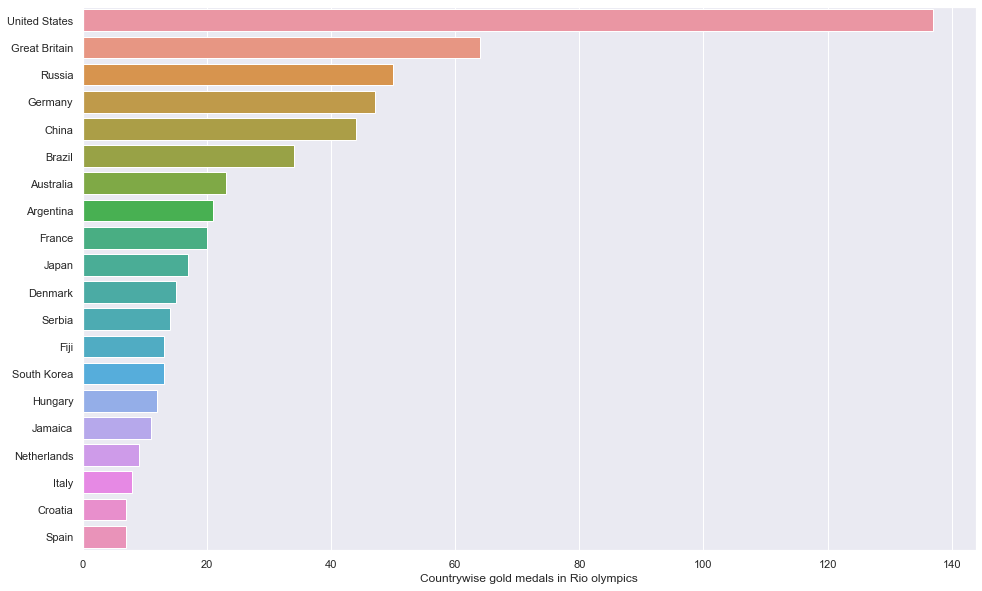

In [164]:

plt.subplots(figsize=(16, 10))
sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel("Countrywise gold medals in Rio olympics")


Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

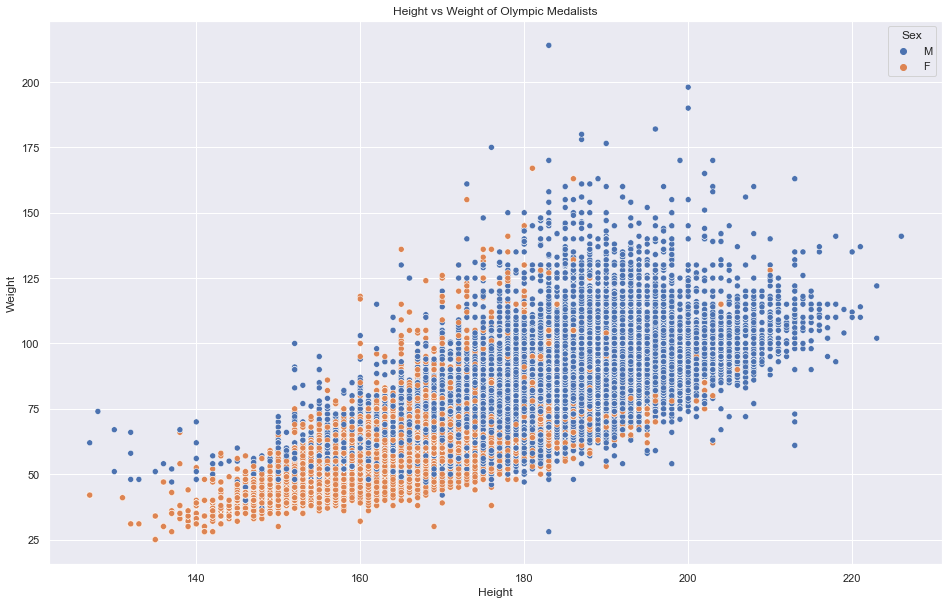

In [166]:
not_null_medals = atheletesdf[(atheletesdf['Height'].notnull()) & atheletesdf['Weight'].notnull() ]
plt.figure(figsize=(16,10))
axis = sns.scatterplot(x='Height',y='Weight', data=not_null_medals, hue='Sex')
plt.title("Height vs Weight of Olympic Medalists")

In [7]:
atheletesdf.query('Name=="Gunnar Nielsen Aaby"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
